In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

In [2]:
x_train = np.array ([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042] , 
                    [10.791], [5.313], [7.997], [3.1]],
                    dtype = np.float32)

y_train = np.array ([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827] , 
                    [3.465], [1.65], [2.904], [1.3]], 
                    dtype = np.float32)

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

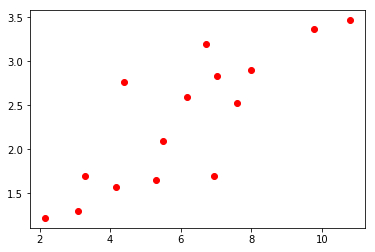

In [3]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')

plt.show()

In [4]:
import torch 

#### Converting data to pytorch tensors
By defualt requires_grad = False

In [5]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [6]:
input_size = 1 
hidden_size = 100
output_size = 1 
learning_rate = 1e-6

#### Create random Tensors for weights.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [7]:
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 100])

In [8]:
w2 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
w2.shape

torch.Size([100, 1])

## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1 
* clamping all negative elements to one using clamp(min=0), similar to Relu Function
* again doing mat product of clamped data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [9]:
for iter in range(1, 301):
    
    y_pred = X_train.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 1238.8021240234375
100 13.255380630493164
150 3.7086801528930664
200 3.633230447769165
250 3.6326303482055664
300 3.6326279640197754


In [14]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[ 6.5208e-01,  9.2157e-02,  4.1704e-01,  7.1146e-01,  8.0063e-01,
          1.4426e-01,  1.4583e-01, -4.6198e-03, -2.6930e-03, -1.5513e-03,
          3.6480e-01,  8.3577e-01,  1.0765e+00,  5.5515e-01,  7.1492e-01,
          6.9971e-01,  8.8529e-01,  5.6581e-01,  5.6716e-01,  5.0480e-02,
          1.4313e-01,  3.9926e-01,  1.7851e-01, -1.1956e-02,  3.2752e-01,
          2.2511e-02,  6.0181e-02,  5.7467e-01,  8.3275e-01, -1.1066e-03,
         -1.0293e-05,  6.8802e-02,  8.7087e-01,  7.1294e-01,  4.6896e-01,
          7.5835e-01,  5.0587e-01,  7.8560e-03,  1.2091e-01,  2.2146e-02,
          5.7942e-01, -4.1824e-03,  1.8441e-03,  8.0505e-01,  2.2302e-01,
         -2.3681e-03,  9.4031e-01,  7.9119e-01,  3.4484e-02,  1.8749e-01,
          4.1758e-01,  3.5598e-01,  5.5338e-01,  5.3725e-01,  1.3684e-01,
          4.6690e-01,  2.0881e-01,  1.8437e-01,  1.4269e-01,  7.8754e-01,
          2.1911e-01,  4.6297e-01,  5.5303e-01,  8.8436e-01, -4.0410e-03,
         -2.8296e-03,  6.3979e-01

#### Checking the output

Converting data into a tensor

In [10]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[  3.3000],
        [  4.4000],
        [  5.5000],
        [  6.7100],
        [  6.9300],
        [  4.1680],
        [  9.7790],
        [  6.1820],
        [  7.5900],
        [  2.1670],
        [  7.0420],
        [ 10.7910],
        [  5.3130],
        [  7.9970],
        [  3.1000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [11]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[ 1.2115],
        [ 1.6154],
        [ 2.0192],
        [ 2.4634],
        [ 2.5442],
        [ 1.5302],
        [ 3.5901],
        [ 2.2696],
        [ 2.7865],
        [ 0.7956],
        [ 2.5853],
        [ 3.9617],
        [ 1.9505],
        [ 2.9359],
        [ 1.1381]])

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [12]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.2115161],
       [1.6153553],
       [2.0191932],
       [2.4634156],
       [2.5441837],
       [1.5301828],
       [3.590127 ],
       [2.2695737],
       [2.786488 ],
       [0.7955625],
       [2.5853019],
       [3.9616613],
       [1.9505415],
       [2.9359074],
       [1.1380908]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

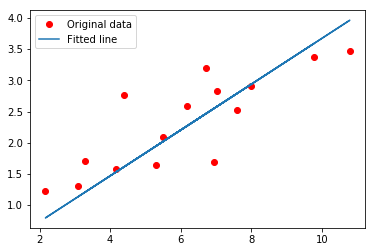

In [13]:
plt.plot(x_train, y_train, 'ro', label = 'Original data') 

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()